## Ex.1 Visualizing data from "Titanic" dataset

*3 points*

This exercise is based on dataset from the legendary [Kaggle](kaggle.com) Titanic ML competition avaiable [here](https://www.kaggle.com/competitions/titanic/overview).

Data and their description can be downloaded from [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).




#### 1.1 Import the necessary libraries

In [273]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

#### 1.2 Import the dataset from [here](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

In [274]:
df = pd.read_csv('train__2_.csv')

#### 1.3  Set PassengerId as the index

In [275]:
df.loc[:, "PassengerId"]

df[1:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### 1.4 Create a pie chart presenting the male/female proportion

* for all passangers
* for surviving passengers

What is your conclusion?


([<matplotlib.patches.Wedge at 0x7ff0c03a1450>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')])

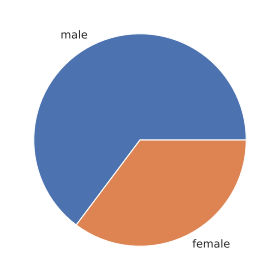

In [276]:
plt.pie(df["Sex"].value_counts(), labels = ["male", "female"])

#### 1.5. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

[]

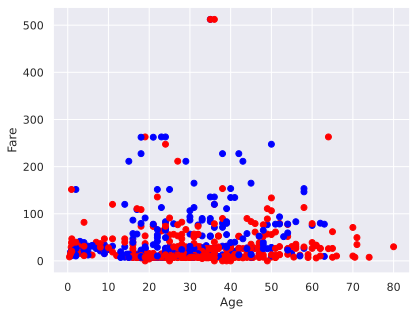

In [277]:
dic = {
    "male": "red",
    "female": "blue"
}

age = np.array(df["Age"])
fare = np.array(df["Fare"])
color = np.array(list(dic[i] for i in df["Sex"]))


# blue for female and red for male

plt.scatter(df["Age"], df["Fare"], c = color)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.plot()

Which chart would be more clear in your opinion?

#### 1.6 How many men older 45 survived?

In [278]:
df[(df["Sex"] == "male") & (df["Age"] > 45) & (df["Survived"] == 1)].describe().count()

PassengerId    8
Survived       8
Pclass         8
Age            8
SibSp          8
Parch          8
Fare           8
dtype: int64

#### 1.7  Create a histogram with the Fare payed

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

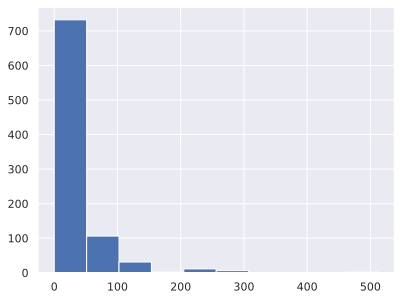

In [279]:
plt.hist(df["Fare"])

#### 1.8 Сreate your own chart that you think would be useful

So, I hope this simple exercise did not cause you any difficulties. Time to move on to the next task. There is no longer any instruction on what charts to draw. You must decide for yourself

## Ex.2 Visualizing data from "Hose Prices" dataset

*7 points*

With 79 independent variables describing (nearly) every aspect of residential buildings in Ames, Iowa, this competition challenges you to predict the final price of each home.

In the very first step of your analysis, you need to
1. define the type of variab-les
2. visualize data
3. which variables do you think would be useful to transform?

The data and their description are [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).